# <b> Big Query Project </b>

In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
from pandas.io.formats.style import Styler

Author: Oscar Casas

This projects goal is to use Google Clouds BigQuery to effectively analyze the data available for Lyft Bikeshare company in San Francisco to recommend different promotions and suggestions to increase ridership. The first part of this project is just some simple SQL queries to answer some initial queries and get some data insight. 

# Part 1: BQ SQL Initial Queries


- ### Question 1: What's the size of this dataset? (i.e., how many trips)

```sql
SELECT Count(DISTINCT trip_id)
FROM   `bigquery-public-data.san_francisco.bikeshare_trips` 
```

#### Answer: 983,648 trips total

- ### Question 2: What is the earliest start date and time and latest end date and time for a trip?

```sql
SELECT Min(start_date),
       Max(end_date)
FROM   `bigquery-public-data.san_francisco.bikeshare_trips` 
```

#### Answer: Min: 2013-08-29 09:08:00 UTC  Max: 2016-08-31 23:48:00 UTC

- ### Question 3: How many bikes are there?

```sql
SELECT Count(DISTINCT bike_number) AS Number_of_bikes
FROM  `bigquery-public-data.san_francisco.bikeshare_trips`
```

#### Answer: 700 bikes total

- ### Question 4: What were the top 5 most common routes subscribers took on workdays and commuting time?

```sql
SELECT start_station_id,
       end_station_id,
       Count(trip_id) AS num_trips
FROM   `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE  Format_date('%A', start_date) NOT IN ( "sat", "sun" )
       AND Format_timestamp('%H', start_date) IN ( "07", "08", "09", "16",
                                                   "17", "18" )
       AND subscriber_type = "Subscriber"
GROUP  BY start_station_id,
          end_station_id
ORDER  BY num_trips DESC; 
```

#### Answer: Station ID {61->50, 69->65, 50->61,60->74,51->70}

- ### Question 5: What are the most 6 common start times for trips in weekdays?

```sql
SELECT Format_timestamp('%H', start_date) AS start_time,
       Count(trip_id)                     AS num_trips
FROM   `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE  Format_date('%A', start_date) != "sun"
        AND Format_date('%A', start_date) != "sat"
GROUP  BY start_time
ORDER  BY num_trips DESC
LIMIT 6; 
```

#### Answer: 8am , 9am, 5pm , 4pm

- ### Question 6: How many trips are taken by subsribers in commuting periods during weekdays?

```sql
SELECT Count(trip_id) AS num_trips  
FROM   `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE  Format_date('%A', start_date) NOT IN ( "sat", "sun" )
       AND Format_timestamp('%H', start_date) IN ( "07", "08", "09", "16",
                                                   "17", "18" )
       AND subscriber_type = "subscriber"
ORDER  BY num_trips DESC; 
```

#### Answer: 548,427 trips

# Part 2: Querying data from the BigQuery CLI 

Rereun queries from part 1 using bq command line tool. First I will print the markdown and then I will run them, magic functions can also be used.

- ### Question 1: What's the size of this dataset? (i.e., how many trips)

```sql
bq query --use_legacy_sql=false '
SELECT Count(DISTINCT trip_id)
FROM   `bigquery-public-data.san_francisco.bikeshare_trips`'
```

In [51]:
! bq query --use_legacy_sql=FALSE 'SELECT start_station_name, end_station_name, count(*) as trip_freq FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY start_station_name, end_station_name ORDER BY trip_freq DESC LIMIT 5'

Waiting on bqjob_r1e12c33855f60470_0000017c32ead16f_1 ... (0s) Current status: DONE   
+-----------------------------------------+--------------------------------------+-----------+
|           start_station_name            |           end_station_name           | trip_freq |
+-----------------------------------------+--------------------------------------+-----------+
| Harry Bridges Plaza (Ferry Building)    | Embarcadero at Sansome               |      9150 |
| San Francisco Caltrain 2 (330 Townsend) | Townsend at 7th                      |      8508 |
| 2nd at Townsend                         | Harry Bridges Plaza (Ferry Building) |      7620 |
| Harry Bridges Plaza (Ferry Building)    | 2nd at Townsend                      |      6888 |
| Embarcadero at Sansome                  | Steuart at Market                    |      6874 |
+-----------------------------------------+--------------------------------------+-----------+


- ### Question 2: What is the earliest start date and time and latest end date and time for a trip?

```sql
bq query --use_legacy_sql=false '
SELECT Min(start_date) AS Min_Start_Date,
       Max(end_date) AS Max_Start_Date
FROM   `bigquery-public-data.san_francisco.bikeshare_trips` '
```

In [55]:
! bq query --use_legacy_sql=false 'SELECT Min(start_date) AS Min_Start_Date,Max(end_date) AS Max_Start_Date FROM   `bigquery-public-data.san_francisco.bikeshare_trips`'

Waiting on bqjob_r27cfed6c3a81444f_0000017c32f01370_1 ... (0s) Current status: DONE   
+---------------------+---------------------+
|   Min_Start_Date    |   Max_Start_Date    |
+---------------------+---------------------+
| 2013-08-29 09:08:00 | 2016-08-31 23:48:00 |
+---------------------+---------------------+


- ### Question 3: How many bikes are there?

```sql
bq query --use_legacy_sql=false '
SELECT Count(DISTINCT bike_number) AS Number_of_bikes
FROM   `bigquery-public-data.san_francisco.bikeshare_trips`'
```

In [58]:
! bq query --use_legacy_sql=false 'SELECT Count(DISTINCT bike_number) AS Number_of_Bikes FROM   `bigquery-public-data.san_francisco.bikeshare_trips`'

Waiting on bqjob_r1f87aeb0aea1f9ea_0000017c32f15743_1 ... (0s) Current status: DONE   
+-----------------+
| Number_of_Bikes |
+-----------------+
|             700 |
+-----------------+


- ### Question 4: How many trips are in the morning vs in the afternoon?

Morning (6:00am - 11:59am):
```sql
  bq query --use_legacy_sql=false '
  SELECT Count(trip_id) AS morning_num_trips  
  FROM   `bigquery-public-data.san_francisco.bikeshare_trips`
  WHERE  Format_timestamp("%H", start_date) IN ( "06","07", "08", 
                                                "09", "10","11");'
```
Afternoon (12:00pm - 5:59pm):
```sql
  bq query --use_legacy_sql=false '
  SELECT Count(trip_id) AS afternoon_num_trips  
  FROM   `bigquery-public-data.san_francisco.bikeshare_trips`
  WHERE  Format_timestamp("%H", start_date) IN ( "12","13", "14",  
                                                 "15","16","17" );'
```

In [65]:
! bq query --use_legacy_sql=false 'SELECT Count(trip_id) AS morning_num_trips FROM   `bigquery-public-data.san_francisco.bikeshare_trips` WHERE  Format_timestamp("%H", start_date) IN ( "06","07", "08", "09", "10","11")'
! bq query --use_legacy_sql=false 'SELECT Count(trip_id) AS afternoon_num_trips FROM   `bigquery-public-data.san_francisco.bikeshare_trips` WHERE  Format_timestamp("%H", start_date) IN ( "12","13", "14", "15","16","17" )'

Waiting on bqjob_r69f83f283bbd6d42_0000017c32fddb12_1 ... (0s) Current status: DONE   
+-------------------+
| morning_num_trips |
+-------------------+
|            399821 |
+-------------------+
Waiting on bqjob_r6ad59416b1d9829d_0000017c32fde217_1 ... (0s) Current status: DONE   
+---------------------+
| afternoon_num_trips |
+---------------------+
|              391199 |
+---------------------+


## Exploratory Questions

Identify the main questions you'll need to answer to make recommendations (list
below, add as many questions as you need).

- Question 1: What constitutes a commuter trip?

- Question 2: What routes do commuters take during commute time?

- Question 3: What regions do subscribers during commute time go in the morning vs the afternoon? (These will be designated as 
morning commute regions and afternoon commute regions)

- Question 4: How many trips are taken by subsribers in commuting periods during weekdays?

- Question 5: What are the 6 most common start times for trips in weekdays seperated by subscriber type?

- Question 6: What were the top 5 most common routes subscribers took on workdays and commuting time?

- Question 7: How many trips did non-subscribers make do specified morning and afternoon commute regions? 

- Question 8: How do subscriber trips trends differ monthly?

### Question 1: What percentage of all trips were taken by subsribers in commuting periods during weekdays?

#### Sub Question 1: How many trips we're taken by subscripted customers during commute periods?

  ```sql
  bq query --use_legacy_sql=false '
  SELECT Count(trip_id) AS num_trips  
  FROM   `bigquery-public-data.san_francisco.bikeshare_trips`
  WHERE  Format_date("%A", start_date) NOT IN ( "sat", "sun" )
         AND Format_timestamp("%H", start_date) IN ( "07", "08", "09", "16",
                                                     "17", "18" )
         AND subscriber_type = "Subscriber"
  ORDER  BY num_trips DESC; '
  ```

In [67]:
! bq query --use_legacy_sql=false 'SELECT Count(trip_id) AS num_trips  FROM   `bigquery-public-data.san_francisco.bikeshare_trips`WHERE  Format_date("%A", start_date) NOT IN ( "sat", "sun" )AND Format_timestamp("%H", start_date) IN ( "07", "08", "09", "16","17", "18") AND subscriber_type = "Subscriber" ORDER  BY num_trips DESC; '

Waiting on bqjob_r2138208b9391040c_0000017c33003ea2_1 ... (0s) Current status: DONE   
+-----------+
| num_trips |
+-----------+
|    548427 |
+-----------+


#### Sub Question 2: How many trips we're taken total?

  ```sql
  bq query --use_legacy_sql=false '
  SELECT Count(DISTINCT trip_id) AS total_trips
  FROM   `bigquery-public-data.san_francisco.bikeshare_trips`'
  ```

In [86]:
! bq query --use_legacy_sql=false 'SELECT Count(DISTINCT trip_id) AS total_trips FROM `bigquery-public-data.san_francisco.bikeshare_trips` '

Waiting on bqjob_r177f4d8a7d9bdd3a_0000017c33067974_1 ... (1s) Current status: DONE   
+-------------+
| total_trips |
+-------------+
|      983648 |
+-------------+


In [154]:
%%bigquery subs_trips

SELECT Count(trip_id) AS num_trips  
FROM   `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE  Format_date("%A", start_date) NOT IN ( "sat", "sun" )
     AND Format_timestamp("%H", start_date) IN ( "07", "08", "09", "16",
                                                 "17", "18" )
     AND subscriber_type = "Subscriber"
ORDER  BY num_trips DESC; 


Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.27s/rows]


In [90]:
%%bigquery total_trips

SELECT Count(DISTINCT trip_id) AS num_trips
FROM   `bigquery-public-data.san_francisco.bikeshare_trips`

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.32s/rows]


In [131]:
print("Subscribers during commute periods account for " + str(100*float(subs_trips["num_trips"][0]/total_trips["num_trips"])) + "%")

Subscribers during commute periods account for 55.75439588145353%


### Question 2: What are the 6 most common start times for trips in weekdays seperated by subscriber type?

```sql
bq query --use_legacy_sql=false '
SELECT Format_timestamp("%H", start_date) AS start_time,
       Count(trip_id)                     AS num_trips,
       subscriber_type,
FROM   `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE  Format_date("%A", start_date) != "sun"
       AND Format_date("%A", start_date) != "sat"
       AND subscriber_type = "Subscriber"
GROUP  BY start_time,
ORDER  BY num_trips DESC; '
```

In [113]:
! bq query --use_legacy_sql=false 'SELECT Format_timestamp("%H", start_date) AS start_time,Count(trip_id)                     AS subscriber_num_trips,FROM   `bigquery-public-data.san_francisco.bikeshare_trips` WHERE  Format_date("%A", start_date) != "sun" AND Format_date("%A", start_date) != "sat" AND subscriber_type = "Subscriber" GROUP  BY start_time ORDER  BY subscriber_num_trips DESC LIMIT 6; '
! bq query --use_legacy_sql=false 'SELECT Format_timestamp("%H", start_date) AS start_time,Count(trip_id)                     AS customer_num_trips,FROM   `bigquery-public-data.san_francisco.bikeshare_trips` WHERE  Format_date("%A", start_date) != "sun" AND Format_date("%A", start_date) != "sat" AND subscriber_type = "Customer" GROUP  BY start_time ORDER  BY customer_num_trips DESC LIMIT 6; '


Waiting on bqjob_r710ad6ab001b6a56_0000017c33123de8_1 ... (2s) Current status: DONE   
+------------+----------------------+
| start_time | subscriber_num_trips |
+------------+----------------------+
| 08         |               127171 |
| 17         |               114915 |
| 09         |                89546 |
| 16         |                76051 |
| 18         |                75798 |
| 07         |                64946 |
+------------+----------------------+
Waiting on bqjob_r5dbe25638e43c437_0000017c33125210_1 ... (0s) Current status: DONE   
+------------+--------------------+
| start_time | customer_num_trips |
+------------+--------------------+
| 15         |              12806 |
| 14         |              12737 |
| 13         |              12719 |
| 16         |              12704 |
| 12         |              12508 |
| 17         |              11387 |
+------------+--------------------+


### Question 3: What are the top 5 regions subscribers ride from during commute time go in the morning and the afternoon?

  * SQL Morning query:
```sql
bq query --use_legacy_sql=false '
SELECT start_station_name,
Count(trip_id) AS num_trips
FROM   `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE  Format_date("%A", start_date) NOT IN ( "sat", "sun" )
       AND Format_timestamp("%H", start_date) IN ( "07", "08", "09" )
       AND subscriber_type = "Subscriber"
GROUP  BY start_station_name
ORDER  BY num_trips DESC
Limit 5; '
```


  * SQL Afternoon query:
```sql
bq query --use_legacy_sql=false '
SELECT start_station_name,
Count(trip_id) AS num_trips
FROM   `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE  Format_date("%A", start_date) NOT IN ( "sat", "sun" )
       AND Format_timestamp("%H", start_date) IN ( "16", "17", "18" )
       AND subscriber_type = "Subscriber"
GROUP  BY start_station_name
ORDER  BY num_trips DESC
LIMIT 5; '
```

In [120]:
! bq query --use_legacy_sql=false 'SELECT start_station_name,Count(trip_id) AS num_trips FROM   `bigquery-public-data.san_francisco.bikeshare_trips` WHERE  Format_date("%A", start_date) NOT IN ( "sat", "sun" )   AND Format_timestamp("%H", start_date) IN ( "07", "08", "09" )   AND subscriber_type = "Subscriber" GROUP  BY start_station_name ORDER  BY num_trips DESC Limit 5; '
! bq query --use_legacy_sql=false 'SELECT start_station_name,Count(trip_id) AS num_trips FROM   `bigquery-public-data.san_francisco.bikeshare_trips` WHERE  Format_date("%A", start_date) NOT IN ( "sat", "sun" )   AND Format_timestamp("%H", start_date) IN ( "16", "17", "18" )   AND subscriber_type = "Subscriber" GROUP  BY start_station_name ORDER  BY num_trips DESC Limit 5; '

Waiting on bqjob_r1393095853268770_0000017c3318834c_1 ... (0s) Current status: DONE   
+-----------------------------------------------+-----------+
|              start_station_name               | num_trips |
+-----------------------------------------------+-----------+
| San Francisco Caltrain (Townsend at 4th)      |     38326 |
| San Francisco Caltrain 2 (330 Townsend)       |     30206 |
| Harry Bridges Plaza (Ferry Building)          |     19594 |
| Temporary Transbay Terminal (Howard at Beale) |     19021 |
| Steuart at Market                             |     14606 |
+-----------------------------------------------+-----------+
Waiting on bqjob_r57cec0ed4fb5e3ee_0000017c33188a3d_1 ... (0s) Current status: DONE   
+------------------------------------------+-----------+
|            start_station_name            | num_trips |
+------------------------------------------+-----------+
| Townsend at 7th                          |     13949 |
| 2nd at Townsend                       

### Question 4: What are the top 5 regions subscribers ride to during commute time go in the morning and the afternoon?

  * SQL Morning query:
```sql
bq query --use_legacy_sql=false '
SELECT end_station_name,
Count(trip_id) AS num_trips
FROM   `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE  Format_date("%A", start_date) NOT IN ( "sat", "sun" )
       AND Format_timestamp("%H", start_date) IN ( "07", "08", "09" )
       AND subscriber_type = "Subscriber"
GROUP  BY end_station_name
ORDER  BY num_trips DESC
Limit 5; '
```

  * SQL Afternoon query:
```sql
bq query --use_legacy_sql=false '
SELECT end_station_name,
Count(trip_id) AS num_trips
FROM   `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE  Format_date("%A", start_date) NOT IN ( "sat", "sun" )
       AND Format_timestamp("%H", start_date) IN ( "16", "17", "18" )
       AND subscriber_type = "Subscriber"
GROUP  BY end_station_name
ORDER  BY num_trips DESC
LIMIT 5; '
```

In [123]:
! bq query --use_legacy_sql=false 'SELECT end_station_name,Count(trip_id) AS num_trips FROM   `bigquery-public-data.san_francisco.bikeshare_trips` WHERE  Format_date("%A", start_date) NOT IN ( "sat", "sun" )       AND Format_timestamp("%H", start_date) IN ( "07", "08", "09" )       AND subscriber_type = "Subscriber" GROUP  BY end_station_name ORDER  BY num_trips DESC Limit 5; '

! bq query --use_legacy_sql=false 'SELECT end_station_name,Count(trip_id) AS num_trips FROM   `bigquery-public-data.san_francisco.bikeshare_trips` WHERE  Format_date("%A", start_date) NOT IN ( "sat", "sun" )       AND Format_timestamp("%H", start_date) IN ( "16", "17", "18" )       AND subscriber_type = "Subscriber" GROUP  BY end_station_name ORDER  BY num_trips DESC Limit 5;  '

Waiting on bqjob_r2e0202a6364dfcbd_0000017c331be778_1 ... (0s) Current status: DONE   
+------------------------------------------+-----------+
|             end_station_name             | num_trips |
+------------------------------------------+-----------+
| San Francisco Caltrain (Townsend at 4th) |     20274 |
| 2nd at Townsend                          |     17215 |
| Townsend at 7th                          |     16600 |
| Market at Sansome                        |     12978 |
| Embarcadero at Sansome                   |     11183 |
+------------------------------------------+-----------+
Waiting on bqjob_r3197f84a9290f469_0000017c331bee0a_1 ... (1s) Current status: DONE   
+-----------------------------------------------+-----------+
|               end_station_name                | num_trips |
+-----------------------------------------------+-----------+
| San Francisco Caltrain (Townsend at 4th)      |     44176 |
| San Francisco Caltrain 2 (330 Townsend)       |     30927 |
| H

### Question 5: How many trips did non-subscribers make to top 5 specified morning and afternoon commute destinations and from the top 5 origin points?

Destination Query:
```sql
bq query --use_legacy_sql=false '
SELECT Count(trip_id) AS num_trips
FROM   `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE  Format_date("%A", start_date) NOT IN ( "sat", "sun" )
       AND Format_timestamp("%H", start_date) IN ( "16", "17", "18" )
       AND subscriber_type = "Customer"
       AND end_station_name IN (SELECT end_station_name,
			    FROM   `bigquery-public-data.san_francisco.bikeshare_trips`
				  WHERE  Format_date("%A", start_date) NOT IN ( "sat", "sun" )
       				AND Format_timestamp("%H", start_date) IN ( "16", "17", "18" )
       				AND subscriber_type = "Subscriber"
				  GROUP  BY end_station_name
				  ORDER  BY Count(trip_id) DESC
				  LIMIT 5)
      OR Format_date("%A", start_date) NOT IN ( "sat", "sun" )
      AND Format_timestamp("%H", start_date) IN ( "07", "08", "09" )
      AND subscriber_type = "Customer"
      AND end_station_name IN (SELECT end_station_name,
			  FROM   `bigquery-public-data.san_francisco.bikeshare_trips`
				WHERE  Format_date("%A", start_date) NOT IN ( "sat", "sun" )
      				AND Format_timestamp("%H", start_date) IN ( "07", "08", "09" )
       				AND subscriber_type = "Subscriber"
				GROUP  BY end_station_name
				ORDER  BY Count(trip_id) DESC
				LIMIT 5); '
```   
Origin Query:
```sql
bq query --use_legacy_sql=false '
SELECT Count(trip_id) AS num_trips
FROM   `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE  Format_date("%A", start_date) NOT IN ( "sat", "sun" )
       AND Format_timestamp("%H", start_date) IN ( "16", "17", "18" )
       AND subscriber_type = "Customer"
       AND start_station_name IN (SELECT start_station_name,
			    FROM   `bigquery-public-data.san_francisco.bikeshare_trips`
				  WHERE  Format_date("%A", start_date) NOT IN ( "sat", "sun" )
       				AND Format_timestamp("%H", start_date) IN ( "16", "17", "18" )
       				AND subscriber_type = "Subscriber"
				  GROUP  BY start_station_name
				  ORDER  BY Count(trip_id) DESC
				  LIMIT 5)
      OR Format_date("%A", start_date) NOT IN ( "sat", "sun" )
      AND Format_timestamp("%H", start_date) IN ( "07", "08", "09" )
      AND subscriber_type = "Customer"
      AND start_station_name IN (SELECT start_station_name,
			  FROM   `bigquery-public-data.san_francisco.bikeshare_trips`
				WHERE  Format_date("%A", start_date) NOT IN ( "sat", "sun" )
      				AND Format_timestamp("%H", start_date) IN ( "07", "08", "09" )
       				AND subscriber_type = "Subscriber"
				GROUP  BY start_station_name
				ORDER  BY Count(trip_id) DESC
				LIMIT 5);'
```

In [132]:
%%bigquery destination_num_trips

SELECT Count(trip_id) AS destination_num_trips
FROM   `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE  Format_date("%A", start_date) NOT IN ( "sat", "sun" )
       AND Format_timestamp("%H", start_date) IN ( "16", "17", "18" )
       AND subscriber_type = "Customer"
       AND end_station_name IN (SELECT end_station_name,
			    FROM   `bigquery-public-data.san_francisco.bikeshare_trips`
				  WHERE  Format_date("%A", start_date) NOT IN ( "sat", "sun" )
       				AND Format_timestamp("%H", start_date) IN ( "16", "17", "18" )
       				AND subscriber_type = "Subscriber"
				  GROUP  BY end_station_name
				  ORDER  BY Count(trip_id) DESC
				  LIMIT 5)
      OR Format_date("%A", start_date) NOT IN ( "sat", "sun" )
      AND Format_timestamp("%H", start_date) IN ( "07", "08", "09" )
      AND subscriber_type = "Customer"
      AND end_station_name IN (SELECT end_station_name,
			  FROM   `bigquery-public-data.san_francisco.bikeshare_trips`
				WHERE  Format_date("%A", start_date) NOT IN ( "sat", "sun" )
      				AND Format_timestamp("%H", start_date) IN ( "07", "08", "09" )
       				AND subscriber_type = "Subscriber"
				GROUP  BY end_station_name
				ORDER  BY Count(trip_id) DESC
				LIMIT 5);

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.71s/rows]


In [130]:
%%bigquery origin_num_trips

SELECT Count(trip_id) AS origin_num_trips
FROM   `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE  Format_date("%A", start_date) NOT IN ( "sat", "sun" )
       AND Format_timestamp("%H", start_date) IN ( "16", "17", "18" )
       AND subscriber_type = "Customer"
       AND start_station_name IN (SELECT start_station_name,
			    FROM   `bigquery-public-data.san_francisco.bikeshare_trips`
				  WHERE  Format_date("%A", start_date) NOT IN ( "sat", "sun" )
       				AND Format_timestamp("%H", start_date) IN ( "16", "17", "18" )
       				AND subscriber_type = "Subscriber"
				  GROUP  BY start_station_name
				  ORDER  BY Count(trip_id) DESC
				  LIMIT 5)
      OR Format_date("%A", start_date) NOT IN ( "sat", "sun" )
      AND Format_timestamp("%H", start_date) IN ( "07", "08", "09" )
      AND subscriber_type = "Customer"
      AND start_station_name IN (SELECT start_station_name,
			  FROM   `bigquery-public-data.san_francisco.bikeshare_trips`
				WHERE  Format_date("%A", start_date) NOT IN ( "sat", "sun" )
      				AND Format_timestamp("%H", start_date) IN ( "07", "08", "09" )
       				AND subscriber_type = "Subscriber"
				GROUP  BY start_station_name
				ORDER  BY Count(trip_id) DESC
				LIMIT 5);

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.63s/rows]


In [137]:
print("Customers came from the same origin as popular commutes " + str(origin_num_trips["origin_num_trips"][0]) + " times")
print("Customers came from the same destination as popular commutes " + str(destination_num_trips["destination_num_trips"][0]) + " times")

Customers came from the same origin as popular commutes 11443 times
Customers came from the same destination as popular commutes 10243 times


### Question 5b: (Follow Up) What percentage of Customer trips during that time did it account for?

Get total trips during same periods and find fraction

```sql
bq query --use_legacy_sql=false '
SELECT Count(trip_id) AS num_trips
FROM   `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE  Format_date("%A", start_date) NOT IN ( "sat", "sun" )
       AND Format_timestamp("%H", start_date) IN ("08","09","07", "16", "17", "18" )
       AND subscriber_type = "Customer"; '
```

In [140]:
%%bigquery total_num_trips

SELECT Count(trip_id) AS num_trips
FROM   `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE  Format_date("%A", start_date) NOT IN ( "sat", "sun" )
       AND Format_timestamp("%H", start_date) IN ("08","09","07", "16", "17", "18" )
       AND subscriber_type = "Customer"; 

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.46s/rows]


In [143]:
print("Customers follow top 5 commuter behavior " + str(100*float((destination_num_trips["destination_num_trips"][0] + origin_num_trips["origin_num_trips"][0])/ (total_num_trips["num_trips"][0]))) +"%")

Customers follow top 5 commuter behavior 45.83615150490362%


# Part 3: Employ notebooks to synthesize query project results

## 3.1 Time of Trips

In [388]:
%%bigquery Time_Trips

SELECT Format_timestamp("%H", start_date) AS start_time,
       Count(trip_id)                     AS num_trips,
       subscriber_type,
FROM   `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE  Format_date("%A", start_date) != "sun"
       AND Format_date("%A", start_date) != "sat"
GROUP  BY start_time, subscriber_type
ORDER  BY start_time; 


Downloading: 100%|██████████| 48/48 [00:01<00:00, 32.14rows/s]


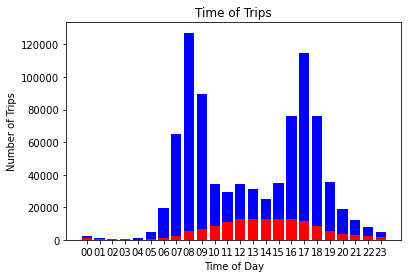

In [389]:
#seperate by sub type
subs = Time_Trips[Time_Trips['subscriber_type']=='Subscriber']
cust = Time_Trips[Time_Trips['subscriber_type']=='Customer']

#print barchart
plt.bar(subs["start_time"], subs["num_trips"], color="BLUE", label="Subscribers")
plt.bar(subs["start_time"], cust["num_trips"], color="RED", label="Customers")
plt.title('Time of Trips')
plt.xlabel('Time of Day')
plt.ylabel('Number of Trips')
plt.show()


While Subscribers tend to travel at very specific periods with peak hours, customers seem to travel highest in the middle of the day.

## 3.2 Stations Most Used During Commute Times

In [390]:
%%bigquery Time_Trips_Mor

SELECT end_station_name, start_station_name,
Count(trip_id) AS num_trips
FROM   `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE  Format_date("%A", start_date) NOT IN ( "sat", "sun" )
       AND Format_timestamp("%H", start_date) IN ( "07", "08", "09" )
       AND subscriber_type = "Subscriber"
GROUP  BY end_station_name, start_station_name
ORDER  BY num_trips DESC ;

Downloading: 100%|██████████| 1721/1721 [00:01<00:00, 1502.36rows/s]


In [391]:
%%bigquery Time_Trips_Aft
SELECT end_station_name, start_station_name,
Count(trip_id) AS num_trips
FROM   `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE  Format_date("%A", start_date) NOT IN ( "sat", "sun" )
       AND Format_timestamp("%H", start_date) IN ( "16", "17", "18" )
       AND subscriber_type = "Subscriber"
GROUP  BY end_station_name, start_station_name
ORDER  BY num_trips DESC;

Downloading: 100%|██████████| 1830/1830 [00:01<00:00, 1413.87rows/s]


In [392]:
%%bigquery Station_Info
SELECT name AS station_name,
       landmark,
       installation_date
FROM   `bigquery-public-data.san_francisco.bikeshare_stations`; 

Downloading: 100%|██████████| 74/74 [00:01<00:00, 59.63rows/s]


In [393]:
# Get Morning and Afternoon Origins and Destinations to get an idea where are people coming and going, expect morning origin to be afternoon destination and vice versa

Dest_Sums_Mor = Time_Trips_Mor.groupby(['end_station_name']).sum().reset_index()
Dest_Sums_Aft = Time_Trips_Aft.groupby(['end_station_name']).sum().reset_index()
Origin_Sums_Mor = Time_Trips_Mor.groupby(['start_station_name']).sum().reset_index()
Origin_Sums_Aft = Time_Trips_Aft.groupby(['start_station_name']).sum().reset_index()

#change datetime
list_date = []
Station_Info['installation_date'] = pd.to_datetime(Station_Info['installation_date'])
for i in Station_Info['installation_date']:
    j = (datetime.datetime.strptime("2016-08-31", '%Y-%m-%d') - i).days
    list_date.append(j)
Station_Info['Days In Use'] = list_date


#Merge Station Info
Merged_Dest_Sums_Mor = Station_Info.merge(Dest_Sums_Mor, how = "inner", left_on = 'station_name', right_on = 'end_station_name')
Merged_Dest_Sums_Aft = Station_Info.merge(Dest_Sums_Aft, how = "inner", left_on = 'station_name', right_on = 'end_station_name')
Merged_Origin_Sums_Mor = Station_Info.merge(Origin_Sums_Mor, how = "inner", left_on = 'station_name', right_on = 'start_station_name')
Merged_Origin_Sums_Aft = Station_Info.merge(Origin_Sums_Aft, how = "inner", left_on = 'station_name', right_on = 'start_station_name')

#Calculate Avg Trips
Merged_Dest_Sums_Mor['Avg Trips per Morning'] = Merged_Dest_Sums_Mor['num_trips'] / Merged_Dest_Sums_Mor['Days In Use']
Merged_Dest_Sums_Aft['Avg Trips per Afternoon'] = Merged_Dest_Sums_Aft['num_trips'] / Merged_Dest_Sums_Aft['Days In Use']
Merged_Origin_Sums_Mor['Avg Trips per Morning'] = Merged_Origin_Sums_Mor['num_trips'] / Merged_Origin_Sums_Mor['Days In Use']
Merged_Origin_Sums_Aft['Avg Trips per Afternoon'] = Merged_Origin_Sums_Aft['num_trips'] / Merged_Origin_Sums_Aft['Days In Use']

#Drop Columns
Merged_Dest_Sums_Mor = Merged_Dest_Sums_Mor.drop(columns = ['installation_date','Days In Use','num_trips', 'station_name'])
Merged_Dest_Sums_Aft = Merged_Dest_Sums_Aft.drop(columns = ['installation_date','Days In Use','num_trips', 'station_name'])
Merged_Origin_Sums_Mor = Merged_Origin_Sums_Mor.drop(columns = ['installation_date','Days In Use','num_trips', 'station_name'])
Merged_Origin_Sums_Aft = Merged_Origin_Sums_Aft.drop(columns = ['installation_date','Days In Use','num_trips', 'station_name'])

#Get Values

In [394]:
#Morning Destinations:
Merged_Dest_Sums_Mor.sort_values('Avg Trips per Morning', ascending = 0).head().style


,landmark,end_station_name,Avg Trips per Morning
51,San Francisco,San Francisco Caltrain (Townsend at 4th),18.364130
67,San Francisco,2nd at Townsend,15.579186
31,San Francisco,Townsend at 7th,15.022624
69,San Francisco,Market at Sansome,11.776770
27,San Francisco,Embarcadero at Sansome,10.111212


In [395]:
#Afternoon Destinations:
Merged_Dest_Sums_Aft.sort_values('Avg Trips per Afternoon', ascending = 0).head().style


,landmark,end_station_name,Avg Trips per Afternoon
51,San Francisco,San Francisco Caltrain (Townsend at 4th),40.014493
37,San Francisco,Grant Avenue at Columbus Avenue,29.548077
63,San Francisco,San Francisco Caltrain 2 (330 Townsend),28.013587
59,San Francisco,Harry Bridges Plaza (Ferry Building),15.615176
60,San Francisco,Temporary Transbay Terminal (Howard at Beale),13.354110


In [396]:
#Morning Origins:

Merged_Origin_Sums_Mor.sort_values('Avg Trips per Morning', ascending = 0).head().style


,landmark,start_station_name,Avg Trips per Morning
36,San Francisco,Grant Avenue at Columbus Avenue,98.644231
50,San Francisco,San Francisco Caltrain (Townsend at 4th),34.715580
62,San Francisco,San Francisco Caltrain 2 (330 Townsend),27.360507
58,San Francisco,Harry Bridges Plaza (Ferry Building),17.700090
59,San Francisco,Temporary Transbay Terminal (Howard at Beale),17.182475


In [397]:
#Afternoon Origins:

Merged_Origin_Sums_Aft.sort_values('Avg Trips per Afternoon', ascending = 0).head().style

,landmark,start_station_name,Avg Trips per Afternoon
37,San Francisco,Grant Avenue at Columbus Avenue,20.067308
31,San Francisco,Townsend at 7th,12.623529
67,San Francisco,2nd at Townsend,12.095928
51,San Francisco,San Francisco Caltrain (Townsend at 4th),12.086051
69,San Francisco,Market at Sansome,9.797641


## 3.3 Regions Used During Commute Times

In [398]:
print("Morning Destination:")
First = Merged_Dest_Sums_Mor.groupby(['landmark']).sum()
First 

Morning Destination:


,Avg Trips per Morning
landmark,
Mountain View,7.510882
Palo Alto,1.846479
Redwood City,1.347444
San Francisco,239.211240
San Jose,10.670585


In [399]:
print("Afternoon Destination:")
Second = Merged_Dest_Sums_Aft.groupby(['landmark']).sum()
Second

Afternoon Destination:


,Avg Trips per Afternoon
landmark,
Mountain View,6.228967
Palo Alto,1.824038
Redwood City,1.095780
San Francisco,243.693353
San Jose,13.342980


In [339]:
print("Morning Origin:")
Third = Merged_Origin_Sums_Mor.groupby(['landmark']).sum()
Third

Morning Origin:


,Avg Trips per Morning
landmark,
Mountain View,6.431667
Palo Alto,1.885065
Redwood City,1.306392
San Francisco,322.641253
San Jose,10.923059


In [338]:
print("Afternoon Origin:")
Fourth = Merged_Origin_Sums_Aft.groupby(['landmark']).sum()
Fourth

Afternoon Origin:


,Avg Trips per Afternoon
landmark,
Mountain View,6.950999
Palo Alto,1.787156
Redwood City,1.142024
San Francisco,234.388091
San Jose,13.175243


[7.510881740713508,
 1.846479150911077,
 1.3474438811766323,
 239.21123978064688,
 10.670584655627081]

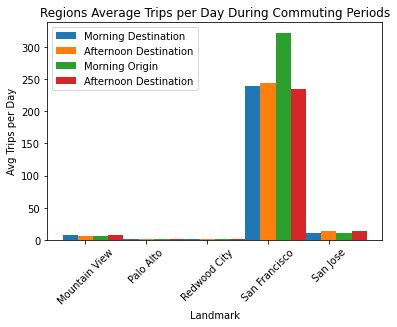

In [386]:
# create barchart
barWidth =.25
r1 = np.arange(5)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
plt.bar(r1, First["Avg Trips per Morning"], width = barWidth, label="Morning Destination")
plt.bar(r2, Second["Avg Trips per Afternoon"], width = barWidth, label="Afternoon Destination")
plt.bar(r3, Third["Avg Trips per Morning"], width = barWidth, label="Morning Origin")
plt.bar(r4, Fourth["Avg Trips per Afternoon"], width = barWidth,  label="Afternoon Destination")
plt.title('Regions Average Trips per Day During Commuting Periods')
plt.xlabel('Landmark')
plt.ylabel('Avg Trips per Day')
plt.xticks([r + barWidth for r in range(5)], ['Mountain View', 'Palo Alto',  'Redwood City', 'San Francisco','San Jose'], rotation = 45)
plt.legend()
plt.show()


## 3.4 Specific Routes

In [363]:
%%bigquery Time_Trips_Mor

SELECT end_station_name, start_station_name,
Count(trip_id) AS num_trips
FROM   `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE  Format_date("%A", start_date) NOT IN ( "sat", "sun" )
       AND Format_timestamp("%H", start_date) IN ( "07", "08", "09")
       AND subscriber_type = "Subscriber"
GROUP  BY end_station_name, start_station_name
ORDER  BY num_trips DESC ;


Downloading: 100%|██████████| 1721/1721 [00:01<00:00, 1589.26rows/s]


In [364]:
Time_Trips_Mor.head()

,end_station_name,start_station_name,num_trips
0,2nd at Townsend,Harry Bridges Plaza (Ferry Building),4487
1,2nd at Townsend,Steuart at Market,3730
2,Townsend at 7th,San Francisco Caltrain 2 (330 Townsend),3488
3,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),3348
4,Temporary Transbay Terminal (Howard at Beale),San Francisco Caltrain (Townsend at 4th),3095


In [360]:
%%bigquery Time_Trips_Aft

SELECT end_station_name, start_station_name,
Count(trip_id) AS num_trips
FROM   `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE  Format_date("%A", start_date) NOT IN ( "sat", "sun" )
       AND Format_timestamp("%H", start_date) IN ( "16", "17", "18")
       AND subscriber_type = "Subscriber"
GROUP  BY end_station_name, start_station_name
ORDER  BY num_trips DESC ;


Downloading: 100%|██████████| 1830/1830 [00:01<00:00, 1770.77rows/s]


In [361]:
Time_Trips_Aft.head()

,end_station_name,start_station_name,num_trips
0,Harry Bridges Plaza (Ferry Building),2nd at Townsend,4130
1,San Francisco Caltrain (Townsend at 4th),Embarcadero at Folsom,3982
2,Steuart at Market,Embarcadero at Sansome,3770
3,San Francisco Caltrain (Townsend at 4th),Steuart at Market,3346
4,San Francisco Caltrain (Townsend at 4th),Temporary Transbay Terminal (Howard at Beale),3280


In [376]:
#Merge Station Info
Merged_Dual_Aft_2 = Station_Info.merge(Time_Trips_Aft, how = "inner", left_on = 'station_name', right_on = 'end_station_name')
Merged_Dual_Aft = Merged_Dual_Aft_2.merge(Station_Info, how = "inner", left_on = 'station_name', right_on = 'station_name')
Merged_Dual_Mor_2 = Station_Info.merge(Time_Trips_Mor, how = "inner", left_on = 'station_name', right_on = 'end_station_name')
Merged_Dual_Mor = Merged_Dual_Mor_2.merge(Station_Info, how = "inner", left_on = 'station_name', right_on = 'station_name')

#Find min time open route

Merged_Dual_Aft['Days Route Use'] = Merged_Dual_Aft[['Days In Use_x','Days In Use_y']].min(axis=1)
Merged_Dual_Mor['Days Route Use'] = Merged_Dual_Mor[['Days In Use_x','Days In Use_y']].min(axis=1)

#Calculate Avg Trips
Merged_Dual_Aft['Avg Trips per Afternoon'] = Merged_Dual_Aft['num_trips'] / Merged_Dual_Aft['Days Route Use']
Merged_Dual_Mor['Avg Trips per Morning'] = Merged_Dual_Mor['num_trips'] / Merged_Dual_Mor['Days Route Use']

#Drop Columns
Merged_Dual_Aft = Merged_Dual_Aft[['start_station_name','end_station_name','Avg Trips per Afternoon']]
Merged_Dual_Mor = Merged_Dual_Mor[['start_station_name','end_station_name','Avg Trips per Morning']]

#sort Tables
Merged_Dual_Aft

In [379]:
Merged_Dual_Aft.sort_values('Avg Trips per Afternoon', ascending = 0).head().style

,start_station_name,end_station_name,Avg Trips per Afternoon
674,Market at Sansome,Grant Avenue at Columbus Avenue,4.288462
1333,2nd at Townsend,Harry Bridges Plaza (Ferry Building),3.730804
1109,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),3.606884
1519,Embarcadero at Sansome,Steuart at Market,3.421053
1110,Steuart at Market,San Francisco Caltrain (Townsend at 4th),3.030797


In [380]:
Merged_Dual_Mor.sort_values('Avg Trips per Morning', ascending = 0).head().style

,start_station_name,end_station_name,Avg Trips per Morning
1501,Harry Bridges Plaza (Ferry Building),2nd at Townsend,4.060633
1502,Steuart at Market,2nd at Townsend,3.375566
486,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,3.156561
786,San Francisco Caltrain (Townsend at 4th),Embarcadero at Folsom,3.024390
620,Temporary Transbay Terminal (Howard at Beale),Grant Avenue at Columbus Avenue,2.990385


## Weekends

In [401]:
%%bigquery weekends

SELECT Format_date("%A", start_date) AS Day,
Count(trip_id) AS num_trips
FROM   `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE  subscriber_type = "Subscriber"
GROUP  BY Day
ORDER  BY num_trips DESC ;

Downloading: 100%|██████████| 7/7 [00:01<00:00,  5.45rows/s]


In [383]:
weekends

,Day,num_trips
0,Tuesday,169668
1,Wednesday,165530
2,Thursday,160296
3,Monday,154795
4,Friday,140048
5,Saturday,31035
6,Sunday,25467


# Conclusion

## Defining Commuters

After carefully looking at the data there are many interesting insights that were picked up on and lend credence to some initial results and hypothesis as well as potential new opportunitoes with rider promotion. Off the bat, one of the big considerations that were taken when looking at this problem was, what defines a commuter trip? After long thoughts, a commuter trip is simply a ride from ones dueling to ones work. This doesn't help because the data has no commuter flag, but when we thing about what most commuters have in common? Schedules. Most commuters commute in the 7am-9am portion of the morning and the 4pm-6pm of the afternoon as well as not commuting on the weekends. That being said, although this hypothesis could be used as a point of investigation it was best to investigate and confirm that this was the case rather than assume so. In Part 3.1 went to graph the total number of trips grouped by hour of the day they started. As was evident, subscribers tended to have more of a pattern of riding in the hypothesized commute time and returning in the hypothesized commute time. Non-subscribers showed the opposite effect in which they did not have specified times that had large increases, rather it grew till midday and then began slowly going down. This was interesting for 2 reasons, first it lended evidence that Subscribers were more than likely commuters as well as that Subscribers were not as likely. It would also make sense as subscribers would have daily needs to warrant their subscription. To see if customers were less likely to be commuters, the top 5 origin and destination points were investigated (Question 4 in Part 2) and while subscribers had a almost perfect mirror image of Origin points in the Morning lining up with the Destination points in the later commute time, subscribers were less so. While subscribers took 383,692 (Part 2 Question 4) trips total to the top 5 Destinations and Origin points out of 548,427 trips (Part 1 Question 6) which was close to a 70%, customers hovered around a 45% (Part 2b Question 5b) While not incredibly low, the fact that customers accounted for less than 10% of rides during commute times as well as the lack of pattern goes to show customers as a less viable commuter. Lastly, in Part 3.5 its clear Saturdays and Sundays account for very little amount of rides around 6% of all rides. With all this we are able to define our commuters as the following: 
Due to data patterns and logic sourounding commutes, commuter trips will be defined as trips done by subscribers between 7:00am-9:59am and 4:00pm-6:59pm Monday through Friday. We cannot guarantee they are all commuters but for the scope of this project it is a adequate filter.

## Top 5 Most Popular Commutes

Once Commuter time was defined, finding the most popular commute was again up for definition. At first the most traveled routes were analyzed, but there seemed to be something missing. For that the analysis was then done on origin points as well as destination points. When it was clear that morning origin points coincided with afternoon destination points and vice versa in Part 2b Question 4. It was important to see if there points we're related somehow. After looking at the station dataset it was clear they were. The majority of the routes originated in San Francisco. It seemeed subscribers traveling either 7:00am-9:59am and 4:00pm-6:59pm Monday through Friday in San Francisco were pretty common. That being said it could get more specific. When looking at the distinction between morning and afternoon Part 2a Question 4, they were very similar in size, so even though minute details could be found it was best to delve in the actual stations. Once that was decided in Part 3.4 again the routes start to end were analyzed but this time with closer inspection. To be common means used often, so rather than measure by number of trips, it was important to measure by average trips in a day of that specified route. This meant finding the date of launch of each start and end station, seeing when the route was viable and finding the total days that route was viable (limited to the max date Part 1 Question 2 08/31/2016) Once this was done, routes were both seperated by morning and afternoon routes since it was clear that they were inversely related and a individual performing one route in the morning would most likely not be performing it in the afternoon. Once all this was said and done out of the 5 routes for both Morning and Afternoon these were the most popular from Part 3.4.

- Subscribers traveling Monday through Friday (Tuesday being the best day)
1. Subscriber from Market at Sansome -> Grant Avenue at Columbus Avenue, 4pm-6:59pm, 4.3 trips per day
2. 2: Harry Bridges Plaza (Ferry Building) -> 2nd at Townsend, 7am-9:59 am, 4.1 trips per day
3. 2nd at Townsend -> Harry Bridges Plaza (Ferry Building), 4pm-6:59pm, 3.7 trips per day
4. Embarcadero at Folsom	San Francisco Caltrain (Townsend at 4th),  4pm-6:59pm, 3.6 trips per day
5. Embarcadero at Sansome	Steuart at Market,  4pm-6:59pm, 3.4 trips per day

## Recommended Promotions

Due to the fact that we know commuters are returning in the afternoon  the same way they went in the morning as well as the commuting patterns we have seen, I would say there is definitely a big opportunity to promote the company.

1. Corporate Promotions: Due to the fact that we know where the majority of our commuters come for work every morning, we also have access to the companies nearby them through a quick google search. I recommend that due to the success we've begun to have in these areas because of their most likely high denisty of jobs and similar target market we invest heavily into partnering with companies to offer these incentives to employees. Not only that but Corporations would most likely be more willing to do business with us once we show them the data of how we've consistenly been performing in their areas. 

2) Annual/Monthly memberships: Due to the majority of our clients being Subscribers and following commuter patterns, it would be wise to focus on long term client rentention. That is why offering Annual and Monthly memberships near top origin and destintion locations at their specified time frame (morning vs afternoon) as defined in Part 3.2 could optimize the viewership by commuters. Using targetted ads by location as well as time will make it so we have the best chance of garnering Subscribers.

3) Same Bike Bonus: Due to commuters seeming to follow their route back home afterwork (Part 2b Question 4), it would be wise to offer some kind of offer/deal to help both commuters and us. Since we want our bikes to not stay in one place or overcrowd a station, we could offer a discount for clients if they return the same bike to the original station after they work. This would do one of two things, first it would ease the strain of having to move all the bikes around at the end of the day to fit the locations and it would create a sense of game and offer cheaper rides to users while economically helping us as well. 

These are all the recommendations I have at the moment, one thing to keep in mind is that although doing promotions in top areas is usually good, there may be more to investigate as it could be that some regions are starting to grow or some stations are already over saturated. That being said, the recommendations offered should definitely do a good job at increasing ridership and as we see the results of these programs more analysis and tweaks will be available.